In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# df.dtypes
# df.select_dtypes('object').nunique()
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [4]:
df.isnull().any()

Unnamed: 0                           False
id                                   False
Gender                               False
Customer Type                        False
Age                                  False
Type of Travel                       False
Class                                False
Flight Distance                      False
Inflight wifi service                False
Departure/Arrival time convenient    False
Ease of Online booking               False
Gate location                        False
Food and drink                       False
Online boarding                      False
Seat comfort                         False
Inflight entertainment               False
On-board service                     False
Leg room service                     False
Baggage handling                     False
Checkin service                      False
Inflight service                     False
Cleanliness                          False
Departure Delay in Minutes           False
Arrival Del

In [10]:
X = df.drop('satisfaction', axis=1)
y = pd.DataFrame(df['satisfaction'])

num_cols = X.select_dtypes('number').columns
onehot_cols = X.select_dtypes('object').columns

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)
sample_row = X.iloc[0,:].to_dict()

In [6]:
num_pipleline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessing = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipleline, num_cols),
    ('cat_pipeline', cat_pipeline, onehot_cols)
])

model = XGBClassifier()

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('model', model)
])

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_valid_encoded = le.transform(y_valid)

pipeline.fit(X_train, y_train_encoded)
preds = pipeline.predict(X_valid)

print(f'accuracy: {accuracy_score(y_valid_encoded, preds)}')






/home/uz/anaconda3/envs/gcash/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/uz/anaconda3/envs/gcash/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


accuracy: 0.9645515205954062


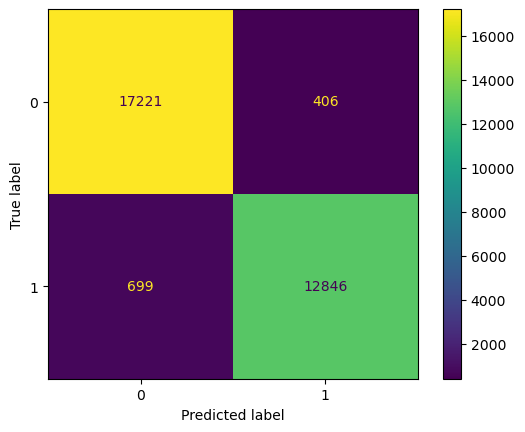

In [7]:
cm = confusion_matrix(y_valid, le.inverse_transform(preds))
ConfusionMatrixDisplay(cm).plot()

In [21]:
import pickle

with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

In [22]:
from typing import Optional
from pydantic import BaseModel, ValidationError, Field

class Flight(BaseModel):
    unnamed_0: int = Field(..., alias='Unnamed: 0')
    id: int
    gender: object = Field(..., alias='Gender')
    customer_type: object = Field(..., alias='Customer Type')
    age: int = Field(..., alias='Age')
    type_of_travel: object = Field(..., alias='Type of Travel')
    flight_class: object = Field(..., alias='Class')
    flight_distance: int = Field(..., alias='Flight Distance')
    inflight_wifi_service: int = Field(..., alias='Inflight wifi service')
    departure_arrival_time_convenient: int = Field(..., alias='Departure/Arrival time convenient')
    ease_of_online_booking: int = Field(..., alias='Ease of Online booking')
    gate_location: int = Field(..., alias='Gate location')
    food_and_drink: int = Field(..., alias='Food and drink')
    online_boarding: int = Field(..., alias='Online boarding')
    seat_comfort: int = Field(..., alias='Seat comfort')
    inflight_entertainment: int = Field(..., alias='Inflight entertainment')
    onboard_service: int = Field(..., alias='On-board service')
    leg_room_service: int = Field(..., alias='Leg room service')
    baggage_handling: int = Field(..., alias='Baggage handling')
    checkin_service: int = Field(..., alias='Checkin service')
    inflight_service: int = Field(..., alias='Inflight service')
    cleanliness: int = Field(..., alias='Cleanliness')
    departure_delay_in_minutes: int = Field(..., alias='Departure Delay in Minutes')
    arrival_delay_in_minutes: object = Field(None, alias='Arrival Delay in Minutes')

with open('pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

with open('label_encoder.pkl', 'rb') as file:
    loaded_le = pickle.load(file)

print(sample_row)
flight = Flight(**sample_row)
inputs = pd.DataFrame([flight.model_dump(by_alias=True)])
pred = loaded_pipeline.predict(inputs)[0]
pred



{'Unnamed: 0': 0, 'id': 70172, 'Gender': 'Male', 'Customer Type': 'Loyal Customer', 'Age': 13, 'Type of Travel': 'Personal Travel', 'Class': 'Eco Plus', 'Flight Distance': 460, 'Inflight wifi service': 3, 'Departure/Arrival time convenient': 4, 'Ease of Online booking': 3, 'Gate location': 1, 'Food and drink': 5, 'Online boarding': 3, 'Seat comfort': 5, 'Inflight entertainment': 5, 'On-board service': 4, 'Leg room service': 3, 'Baggage handling': 4, 'Checkin service': 4, 'Inflight service': 5, 'Cleanliness': 5, 'Departure Delay in Minutes': 25, 'Arrival Delay in Minutes': 18.0}


0

In [23]:
from flask import Flask, jsonify, request

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        flight = Flight(**request.json)
        inputs = pd.DataFrame([flight.model_dump(by_alias=True)])
        pred = loaded_pipeline.predict(inputs)
        actual_pred = loaded_le.inverse_transform(pred)[0]
        response = {
            'prediction': actual_pred
        }
        return jsonify(response), 200
    except ValidationError as e:
        return jsonify(e.errors()), 400


if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


SystemExit: 1

/home/uz/anaconda3/envs/gcash/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
